<a href="https://colab.research.google.com/github/veroorli/ProjetProg/blob/master/xpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Xpath 1.0

**Attention:** la librairie XML utilisée dans ce TP fournit XPath 1.0 et il faut utiliser des fonctions XPath ou Python pour obtenir l'expressivité de XPath 2.0. 

https://www.w3.org/TR/1999/REC-xpath-19991116/

https://lxml.de/

In [ ]:
!pip install lxml
!pip install graphviz
!pip install pydotplus
!pip install rdflib

In [ ]:
import io
import pydotplus
from lxml import etree
from copy import deepcopy
from graphviz import Source
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

### Fonctions d'affichage

In [ ]:
def printXML(element):
    t=etree.ElementTree(element)
    print(etree.tostring(t, pretty_print=True, encoding='unicode'))
 
        
def printXPath(xmltree,xp):
    r=xmltree.xpath(xp)
    for x in r:
        if isinstance(x,str):
            if x.is_text:
                print(x)
            if x.is_attribute:
                print(x.getparent().attrib)
        elif isinstance(x,float):
            print(x)
        else:
            printXML(x)

def displayXPath(xmltree,xp,pngfile="reponse"):
    r=xmltree.xpath(xp)
    reponse=etree.Element("reponse", xpath=xp)
    for x in r:
        reponse.append(deepcopy(x))
    displayXMLInline(reponse)

    
def displayXML(t,pngfile="test"):
    f_xslt = open("xslt/xml2dot.xslt","r")
    xslt=etree.parse(f_xslt)
    transform = etree.XSLT(xslt)
    s_dot=transform(t)
    s=Source(s_dot,filename="gendata/"+pngfile+".dot", format="png")
    s.view()
    
def displayXMLInline(t):
    f_xslt = open("xslt/xml2dot.xslt","r")
    xslt=etree.parse(f_xslt)
    transform = etree.XSLT(xslt)
    s_dot=transform(t)
    dg = pydotplus.graph_from_dot_data(str(s_dot))
    png = dg.create_png()
    display(Image(png))

### Lecture des documents XML

In [ ]:
# ouvrir les fichiers XML
f1 = open("data/roisdefrance.xml","r")
f2 = open("data/roisdefranceplat.xml","r")
# parser les documents
tree1=etree.parse(f1)
tree2=etree.parse(f2)

### Affichage graphique des documents xml 
nécessite l'installation de graphviz (https://graphviz.org/)
* Linux : sudo apt install graphviz
* Windows : http://graphviz.org/download 

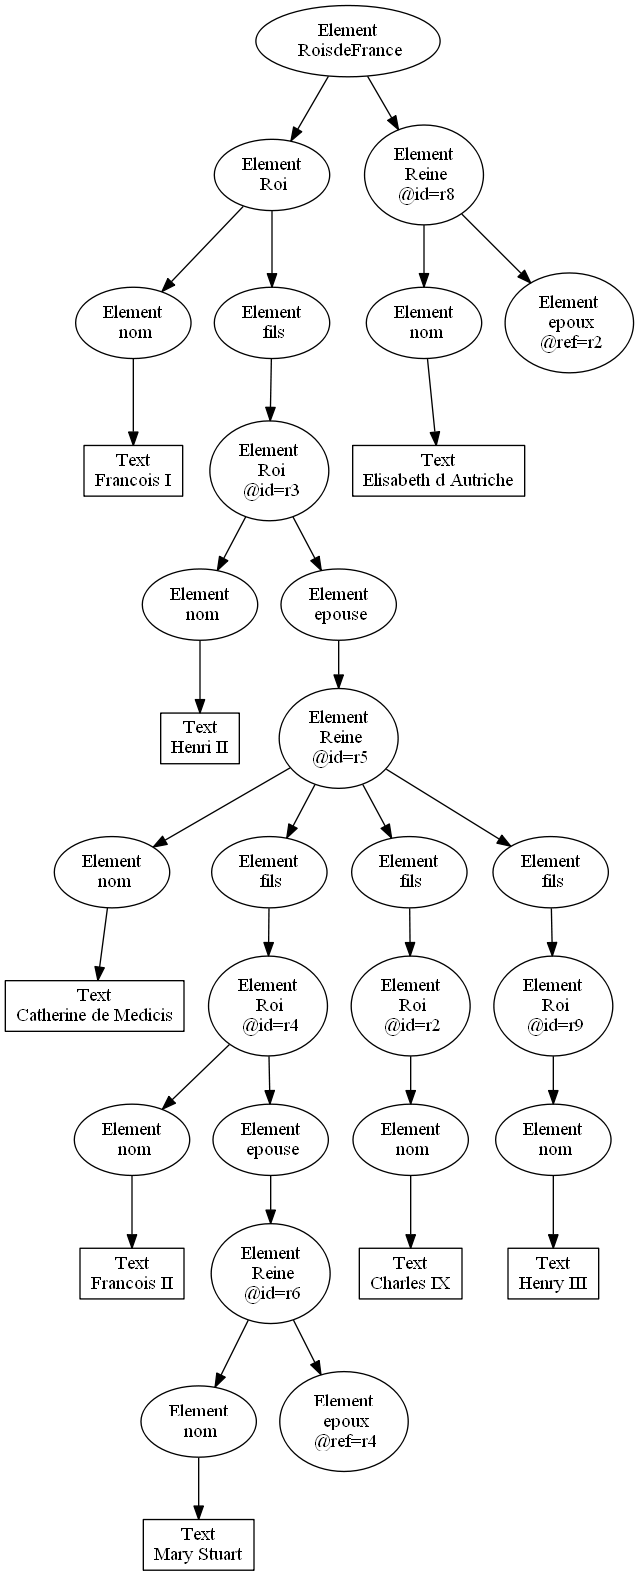

In [ ]:
displayXMLInline(tree1)

In [ ]:
q0='/*'
printXPath(tree2,q0)

<RoisdeFrance>
  <Roi>
    <nom>Francois I</nom>
    <fils ref="r3"/>
  </Roi>
  <Roi id="r3">
    <nom>Henri II</nom>
    <fils ref="r4"/>
    <fils ref="r2"/>
    <fils ref="r9"/>
    <epouse ref="r5"/>
  </Roi>
  <Roi id="r4">
    <nom>Francois II</nom>
    <epouse ref="r6"/>
  </Roi>
  <Roi id="r2">
    <nom>Charles IX</nom>
    <epouse ref="r8"/>
  </Roi>
  <Roi id="r9">
    <nom>Henry III</nom>
  </Roi>
  <Reine id="r5">
    <nom>Catherine de Medicis</nom>
    <fils ref="r4"/>
    <fils ref="r2"/>
    <fils ref="r9"/>
  </Reine>
  <Reine id="r6">
    <nom>Mary Stuart</nom>
    <epoux ref="r4"/>
  </Reine>
  <Reine id="r8">
    <nom>Elisabeth d Autriche</nom>
    <epoux ref="r2"/>
  </Reine>
</RoisdeFrance>



**Exercice:** Evaluez les expressions XPath suivants et étudiez les résultats

In [ ]:
# tree1
q0='/*'
printXPath(tree1,q0)

<RoisdeFrance>
  <Roi>
    <nom>Francois I</nom>
    <fils>
      <Roi id="r3">
        <nom>Henri II</nom>
        <epouse>
          <Reine id="r5">
            <nom>Catherine de Medicis</nom>
            <fils>
              <Roi id="r4">
                <nom>Francois II</nom>
                <epouse>
                  <Reine id="r6">
                    <nom>Mary Stuart</nom>
                    <epoux ref="r4"/>
                  </Reine>
                </epouse>
              </Roi>
            </fils>
            <fils>
              <Roi id="r2">
                <nom>Charles IX</nom>
              </Roi>
            </fils>
            <fils>
              <Roi id="r9">
                <nom>Henry III</nom>
              </Roi>
            </fils>
          </Reine>
        </epouse>
      </Roi>
    </fils>
  </Roi>
  <Reine id="r8">
    <nom>Elisabeth d Autriche</nom>
    <epoux ref="r2"/>
  </Reine>
</RoisdeFrance>



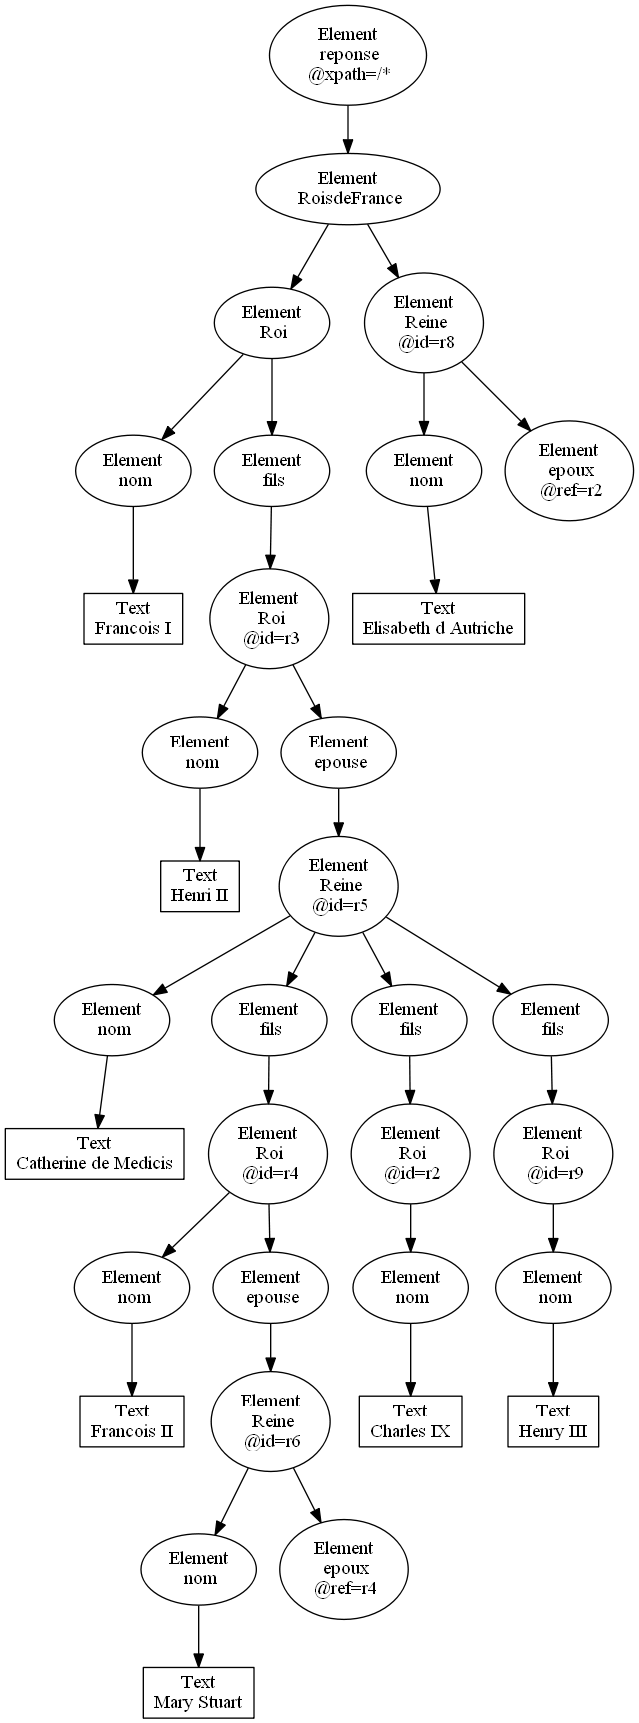

In [ ]:
# affichage graphique
displayXPath(tree1,q0,"res0")

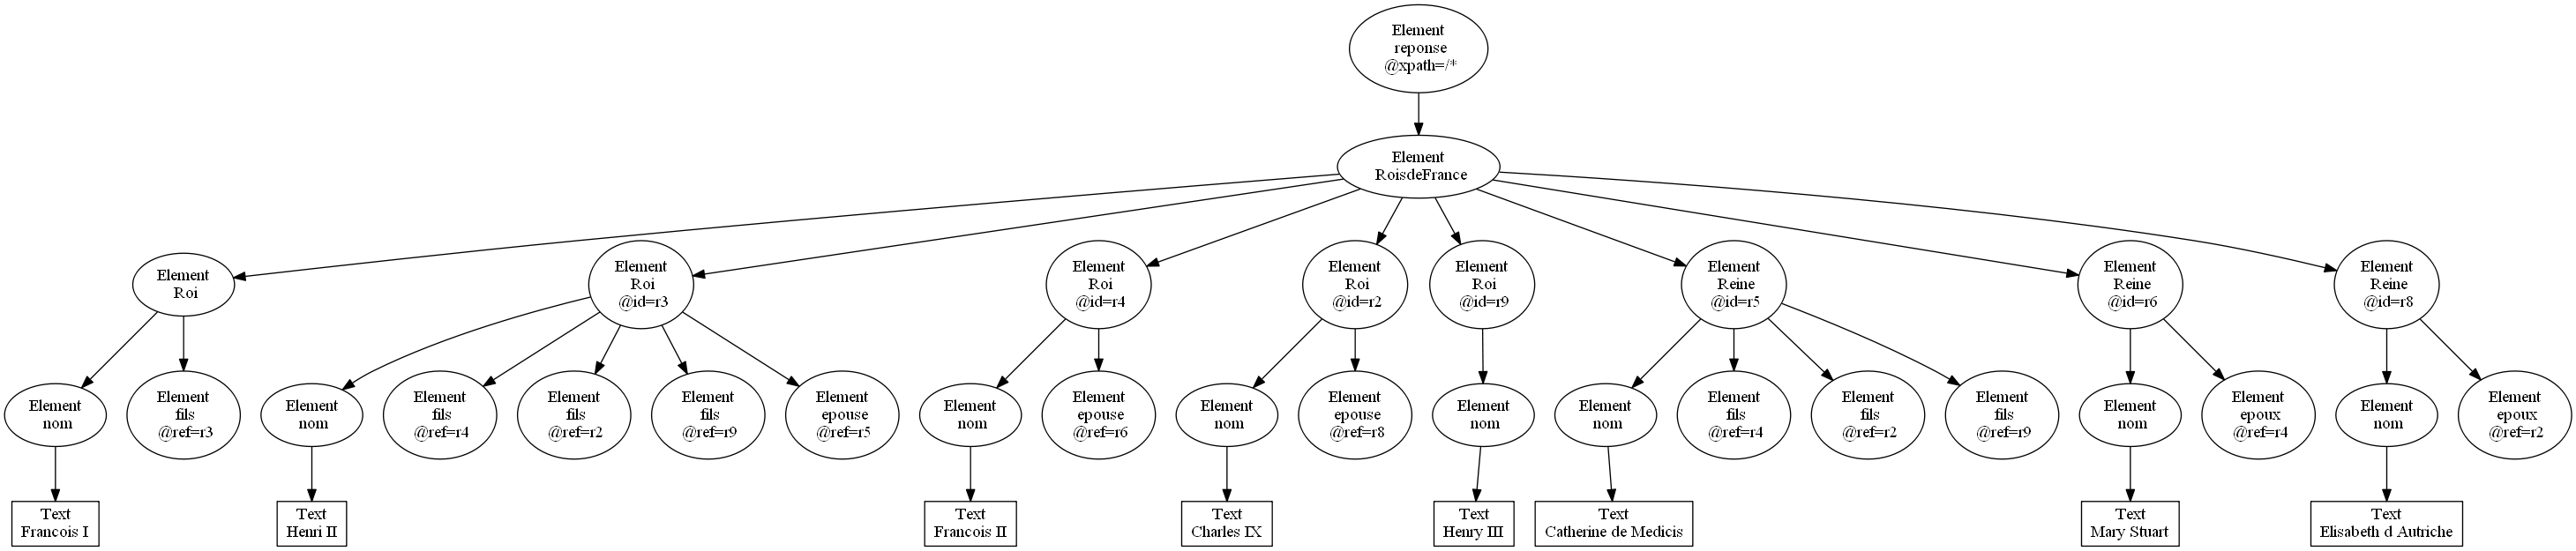

In [ ]:
displayXPath(tree2,q0,"res0")

In [ ]:
# tous les rois
q1='//Roi'
printXPath(tree1,q1)

<Roi>
  <nom>Francois I</nom>
  <fils>
    <Roi id="r3">
      <nom>Henri II</nom>
      <epouse>
        <Reine id="r5">
          <nom>Catherine de Medicis</nom>
          <fils>
            <Roi id="r4">
              <nom>Francois II</nom>
              <epouse>
                <Reine id="r6">
                  <nom>Mary Stuart</nom>
                  <epoux ref="r4"/>
                </Reine>
              </epouse>
            </Roi>
          </fils>
          <fils>
            <Roi id="r2">
              <nom>Charles IX</nom>
            </Roi>
          </fils>
          <fils>
            <Roi id="r9">
              <nom>Henry III</nom>
            </Roi>
          </fils>
        </Reine>
      </epouse>
    </Roi>
  </fils>
</Roi>

<Roi id="r3">
  <nom>Henri II</nom>
  <epouse>
    <Reine id="r5">
      <nom>Catherine de Medicis</nom>
      <fils>
        <Roi id="r4">
          <nom>Francois II</nom>
          <epouse>
            <Reine id="r6">
              <nom>Mary S

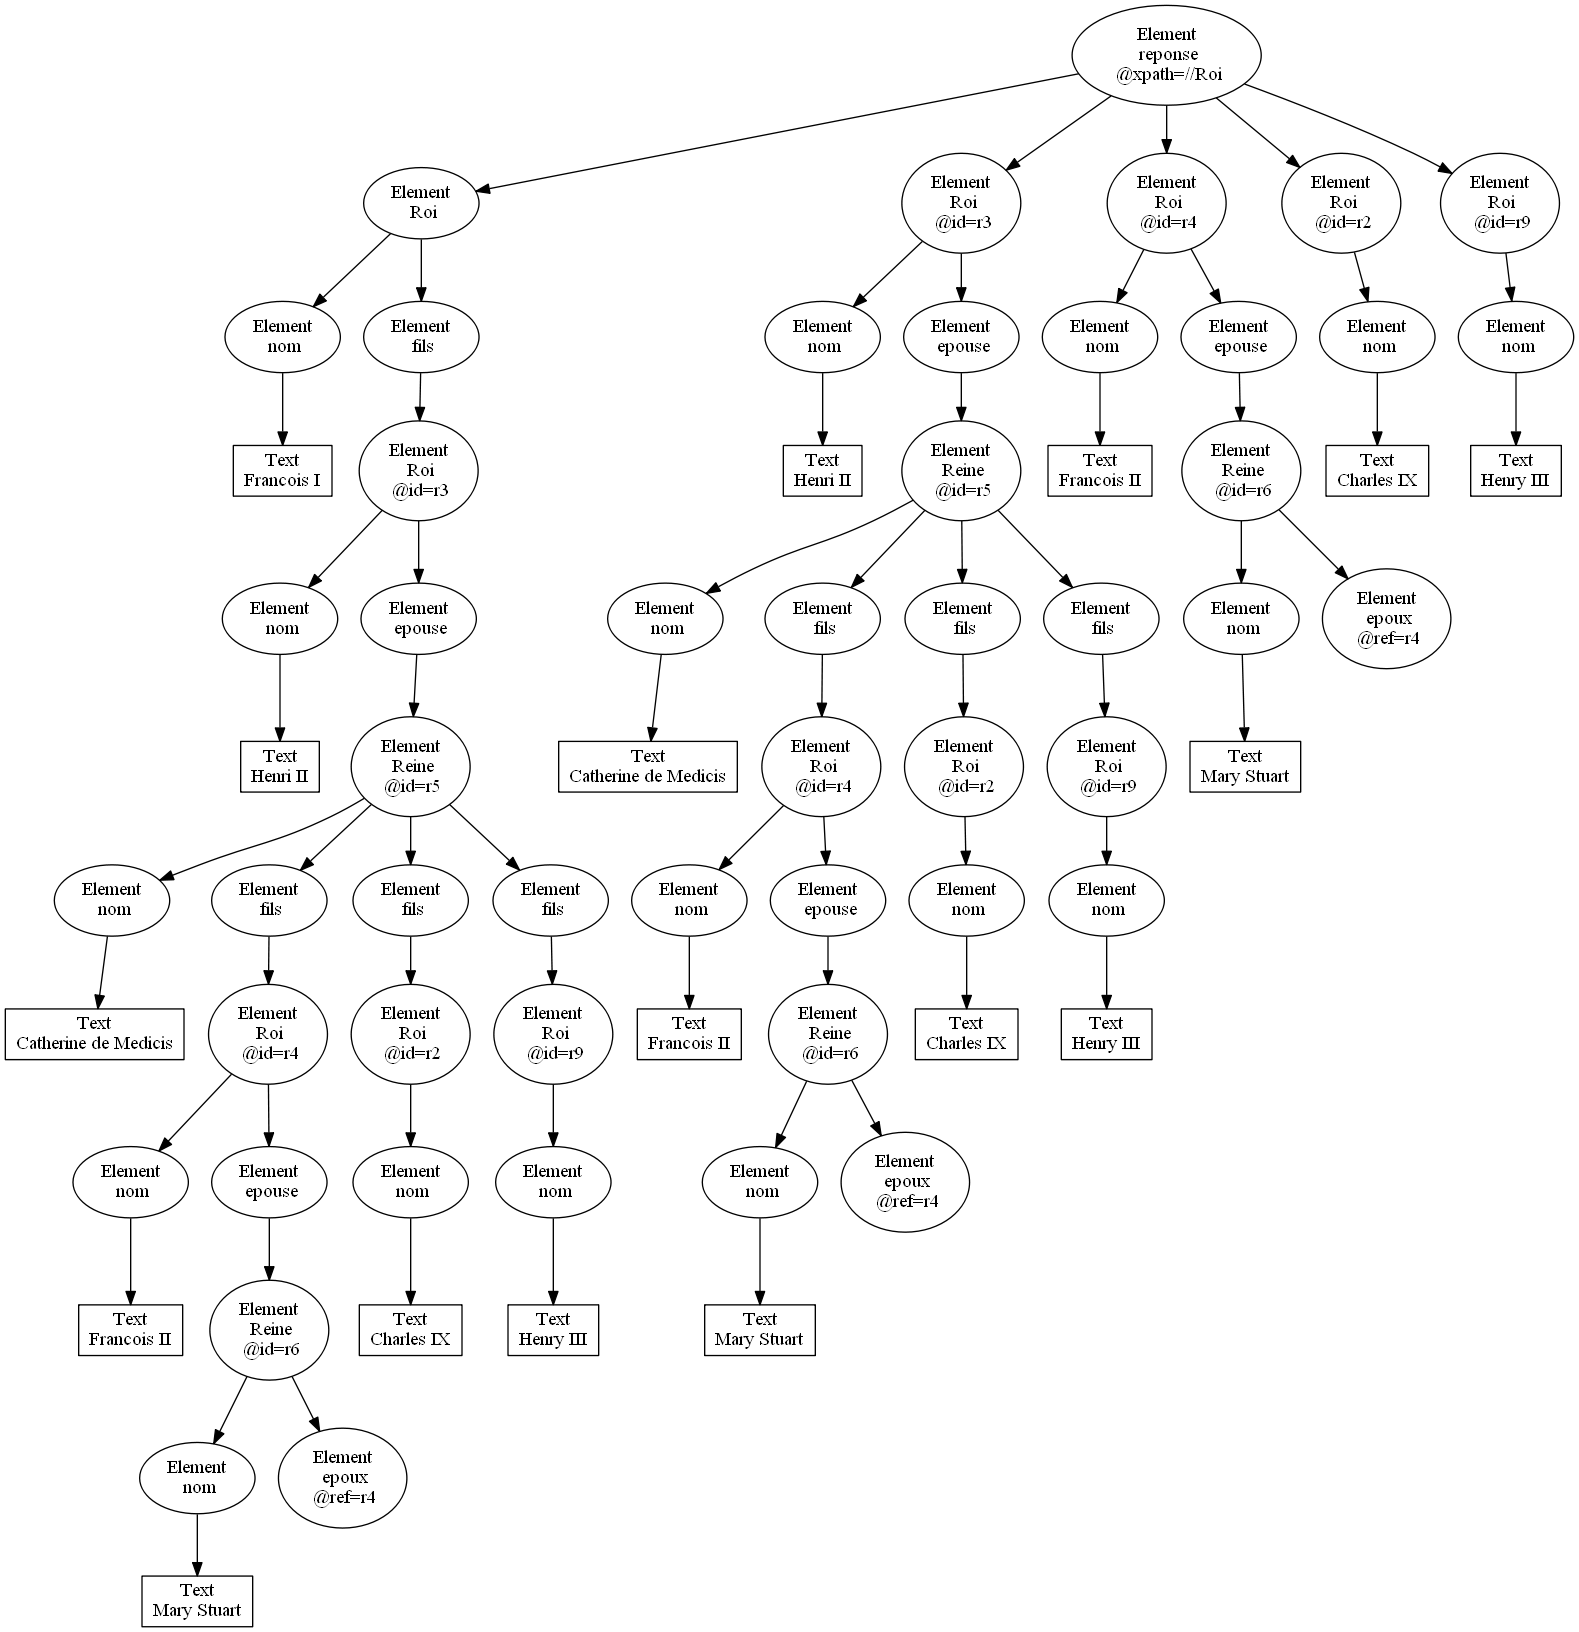

In [ ]:
# affichage graphique
displayXPath(tree1,q1,"res1")

In [ ]:
# tous les rois 
q1='//Roi'
printXPath(tree2,q1)

<Roi>
    <nom>Francois I</nom>
    <fils ref="r3"/>
  </Roi>
  

<Roi id="r3">
    <nom>Henri II</nom>
    <fils ref="r4"/>
    <fils ref="r2"/>
    <fils ref="r9"/>
    <epouse ref="r5"/>
  </Roi>
  

<Roi id="r4">
    <nom>Francois II</nom>
    <epouse ref="r6"/>
  </Roi>
  

<Roi id="r2">
    <nom>Charles IX</nom>
    <epouse ref="r8"/>
  </Roi>
  

<Roi id="r9">
    <nom>Henry III</nom>
  </Roi>
  



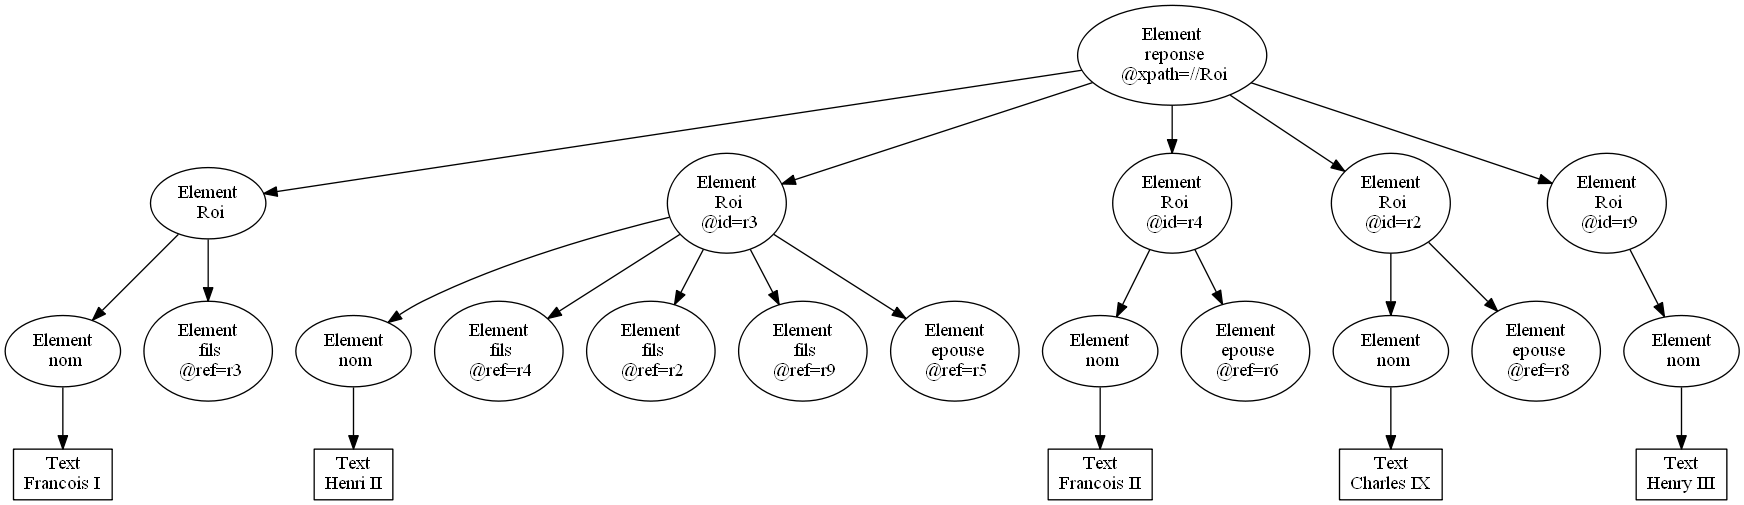

In [ ]:
# affichage graphique
displayXPath(tree2,q1,"res2")

In [ ]:
# l'epouse de François II
q2a='//Roi[nom="Francois II"]/epouse'
printXPath(tree1,q2a)

<epouse>
  <Reine id="r6">
    <nom>Mary Stuart</nom>
    <epoux ref="r4"/>
  </Reine>
</epouse>



In [ ]:
# réécrire la requête précédente appliquée à tree2 
q2a='//Reine[@id=//Roi[nom="Francois II"]/epouse/@ref]'
printXPath(tree2,q2a)

<Reine id="r6">
    <nom>Mary Stuart</nom>
    <epoux ref="r4"/>
  </Reine>
  



**Exercice:** exprimez les requêtes suivantes sur tree1 et tree2

- le nom de l'épouse de François II

In [ ]:
q='//Roi[nom="Francois II"]/epouse/Reine/nom'
printXPath(tree1,q)

q='//Reine[@id=//Roi[nom="Francois II"]/epouse/@ref]/nom'
printXPath(tree2,q)

<nom>Mary Stuart</nom>

<nom>Mary Stuart</nom>
    



- le nom de l'épouse de François II (sans tag)

In [ ]:
q='//Roi[nom="Francois II"]/epouse/Reine/nom/text()'
printXPath(tree1,q)

#q='//Reine[@id=//Roi[nom="Francois II"]/epouse/@ref]/nom/text()'
q='//Reine[epoux/@ref=//Roi[nom="Francois II"]/@id]/nom/text()'
printXPath(tree2,q)

Mary Stuart
Mary Stuart


- les noms des rois et des reines

In [ ]:
#q='//nom[parent::Roi or parent::Reine]'
q='//*/nom'
printXPath(tree1,q)

#q='//nom[parent::Roi or parent::Reine]'
q='//*/nom'
printXPath(tree2,q)

<nom>Francois I</nom>

<nom>Henri II</nom>

<nom>Catherine de Medicis</nom>

<nom>Francois II</nom>

<nom>Mary Stuart</nom>

<nom>Charles IX</nom>

<nom>Henry III</nom>

<nom>Elisabeth d Autriche</nom>

<nom>Francois I</nom>
    

<nom>Henri II</nom>
    

<nom>Francois II</nom>
    

<nom>Charles IX</nom>
    

<nom>Henry III</nom>
  

<nom>Catherine de Medicis</nom>
    

<nom>Mary Stuart</nom>
    

<nom>Elisabeth d Autriche</nom>
    



- les noms des fils de Catherine de Medicis;

In [ ]:
#q="//nom[ancestor::Reine/nom='Catherine de Medicis' and parent::node()/parent::fils]"
q="//Reine[nom='Catherine de Medicis']/fils/Roi/nom"
printXPath(tree1,q)

q="//Roi[@id=//Reine[nom='Catherine de Medicis']/fils/@ref]/nom"
printXPath(tree2,q)

<nom>Francois II</nom>

<nom>Charles IX</nom>

<nom>Henry III</nom>

<nom>Francois II</nom>
    

<nom>Charles IX</nom>
    

<nom>Henry III</nom>
  



- le nom de l’épouse de Henri II; 

In [ ]:
q="//Roi[nom='Henri II']/epouse/Reine/nom"
printXPath(tree1,q)

q="//Reine[@id=//Roi[nom='Henri II']/epouse/@ref]/nom"
printXPath(tree2,q)

<nom>Catherine de Medicis</nom>

<nom>Catherine de Medicis</nom>
    



- le nom de l’époux de Mary Stuart (attention il existe une référence);

    
   


In [ ]:
q="//Roi[@id=//Reine[nom='Mary Stuart']/epoux/@ref]/nom"
printXPath(tree1,q)

q="//Roi[@id=//Reine[nom='Mary Stuart']/epoux/@ref]/nom"
printXPath(tree2,q)

<nom>Francois II</nom>

<nom>Francois II</nom>
    



- le nom de l’époux d’Elisabeth d’Autriche;

   

In [ ]:
q="//Roi[@id=//Reine[nom='Elisabeth d Autriche']/epoux/@ref]/nom"
printXPath(tree1,q)

q="//Roi[@id=//Reine[nom='Elisabeth d Autriche']/epoux/@ref]/nom"
printXPath(tree2,q)

<nom>Charles IX</nom>

<nom>Charles IX</nom>
    



- le nom de la belle mère de Mary Stuart (de la personne qui a un fils dont l’épouse s’appelle Mary Stuart);

 

In [ ]:
#q="//Reine[nom='Mary Stuart']/ancestor::Reine[position()=1]/nom"
q="//Reine[fils/Roi/epouse/Reine/nom='Mary Stuart']/nom"
printXPath(tree1,q)

q="//Reine[fils/@ref=//Reine[nom='Mary Stuart']/epoux/@ref]/nom"
printXPath(tree2,q)

<nom>Catherine de Medicis</nom>

<nom>Catherine de Medicis</nom>
    



- les noms des frères de Francois II;

    

In [ ]:
q="//Reine[fils/Roi/nom='Francois II']/fils/Roi[not(nom='Francois II')]/nom"
printXPath(tree1,q)

q="//Roi[not(nom='Francois II') and @id=//Reine[fils/@ref=//Roi[nom='Francois II']/@id]/fils/@ref]/nom"
printXPath(tree2,q)

<nom>Charles IX</nom>

<nom>Henry III</nom>

<nom>Charles IX</nom>
    

<nom>Henry III</nom>
  



- les rois sans épouses;

In [ ]:
q="//Roi[not(epouse) and not(@id=//Reine/epoux/@ref)]/nom"
printXPath(tree1,q)

q="//Roi[not(epouse) and not(@id=//Reine/epoux/@ref)]/nom"
printXPath(tree2,q)

<nom>Francois I</nom>

<nom>Henry III</nom>

<nom>Francois I</nom>
    

<nom>Henry III</nom>
  



- les noms des rois et reines avec au moins un fils;

    

In [ ]:
#q="//nom[parent::Roi/fils or parent::Reine/fils]"
q="//*[fils]/nom"
printXPath(tree1,q)

#q="//nom[parent::Roi/fils or parent::Reine/fils]"
q="//*[fils]/nom"
printXPath(tree2,q)

<nom>Francois I</nom>

<nom>Catherine de Medicis</nom>

<nom>Francois I</nom>
    

<nom>Henri II</nom>
    

<nom>Catherine de Medicis</nom>
    



-  les noms des rois et reines sans fils;

In [ ]:
#q="//nom[not(parent::Roi/fils) and not(parent::Reine/fils)]"
q="//*[not(fils)]/nom"
printXPath(tree1,q)

#q="//nom[not(parent::Roi/fils) and not(parent::Reine/fils)]"
q="//*[not(fils)]/nom"
printXPath(tree2,q)

<nom>Henri II</nom>

<nom>Francois II</nom>

<nom>Mary Stuart</nom>

<nom>Charles IX</nom>

<nom>Henry III</nom>

<nom>Elisabeth d Autriche</nom>

<nom>Francois II</nom>
    

<nom>Charles IX</nom>
    

<nom>Henry III</nom>
  

<nom>Mary Stuart</nom>
    

<nom>Elisabeth d Autriche</nom>
    

